<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_5_Cross_Validation%2C_Bias_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

## moons

In [0]:
from sklearn.datasets import make_moons as make_datatype
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# random_state = np.random.RandomState(0)
random_state = 0

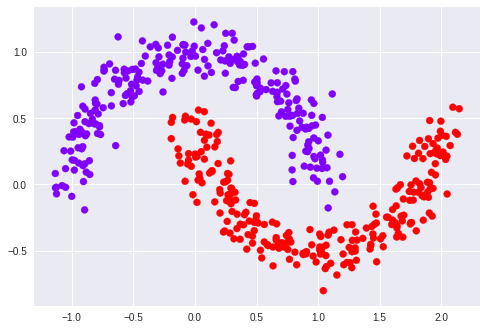

In [38]:
X, y = make_datatype(n_samples=500, noise=0.1,
                     random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [51]:
{y_val for y_val in y}

{0, 1}

In [56]:
y[: 5]

array([0, 1, 1, 1, 1])

# Apply Classifier

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)

In [53]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
y_pred_proba[: 5]

array([[0.91241253, 0.08758747],
       [0.96643752, 0.03356248],
       [0.89440099, 0.10559901],
       [0.96098211, 0.03901789],
       [0.06941581, 0.93058419]])